In [23]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [24]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [25]:
coloursk = ['#006a9c','#00aa83' ,'#f0bc02']
coloursa = ['#006a9c','#0097a1' ,'#43b859', '#f0bc02']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labelsk = ['100K', '500K' , '1570']
leg_labelsa = ['100K', '500K' , '1570', '2310']


In [26]:
def kinetic_heating_plots():
    kheatfiles = glob.glob('*Kheating.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1])
                col.fill_between(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Kheating_plots.pdf')
    plt.show()

def ann_heating_plots():
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1])
                col.fill_between(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], color = coloursa[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Aheating_plots.pdf')
    plt.show()

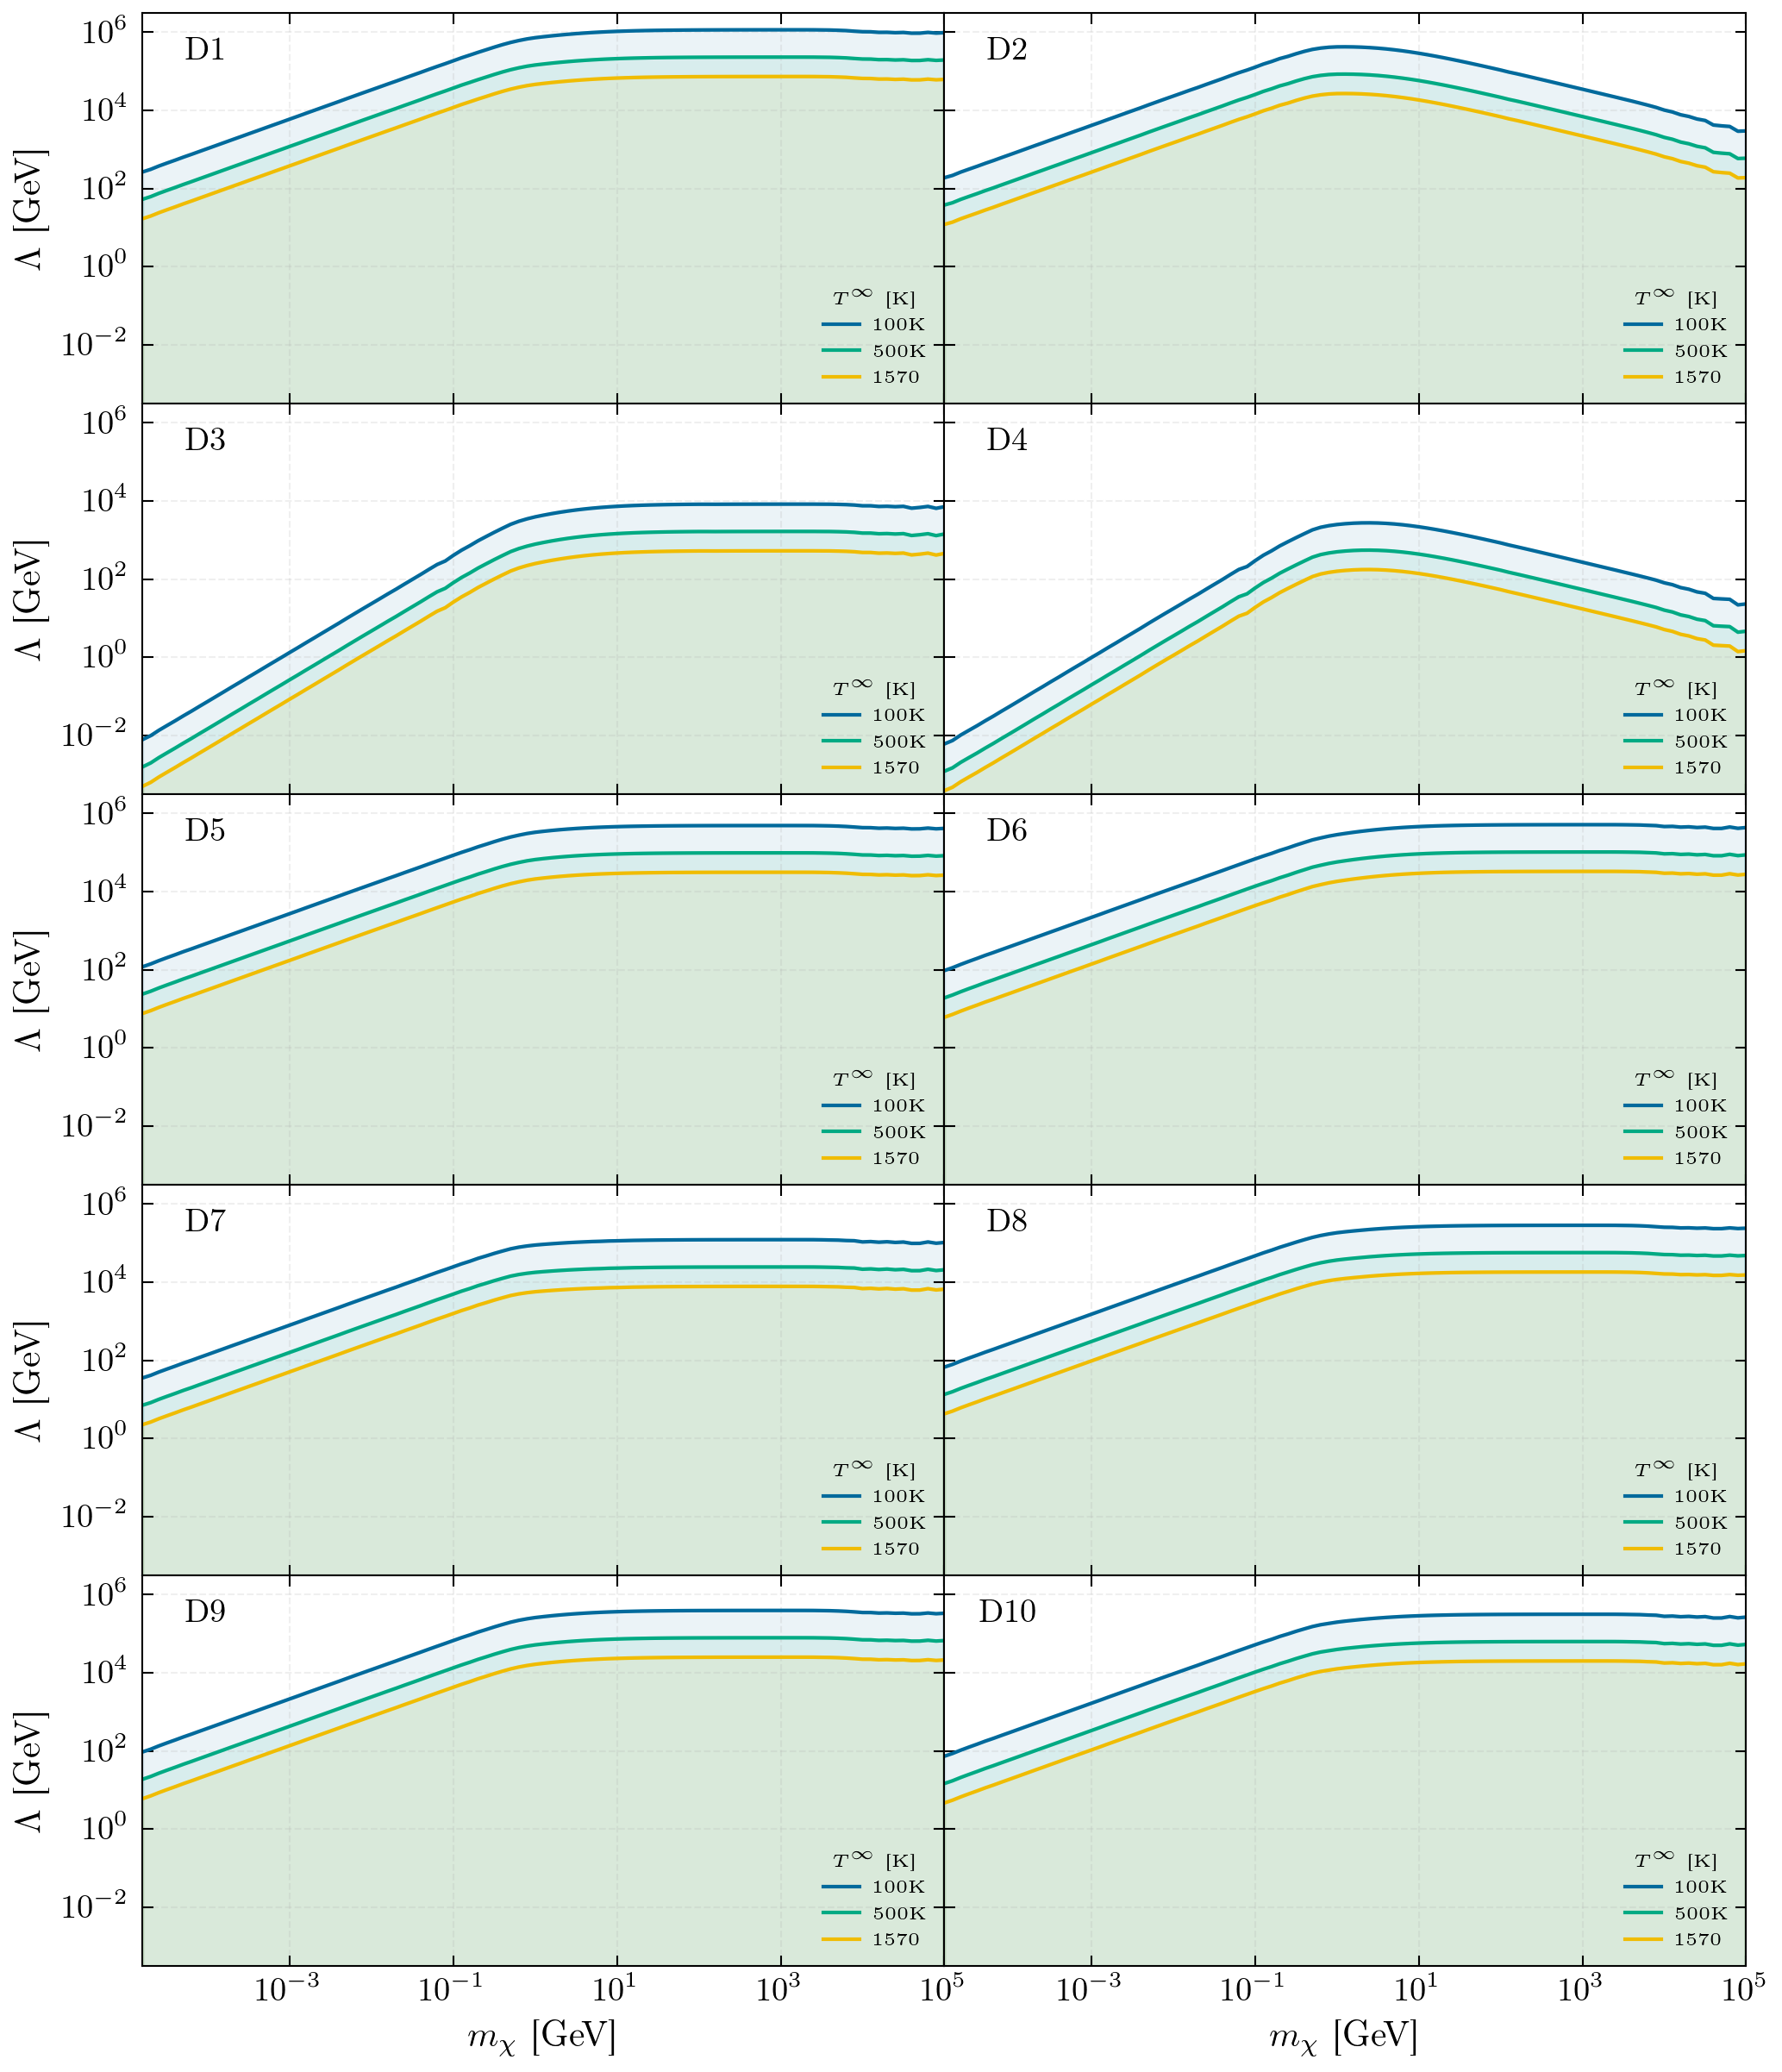

In [27]:
kinetic_heating_plots()

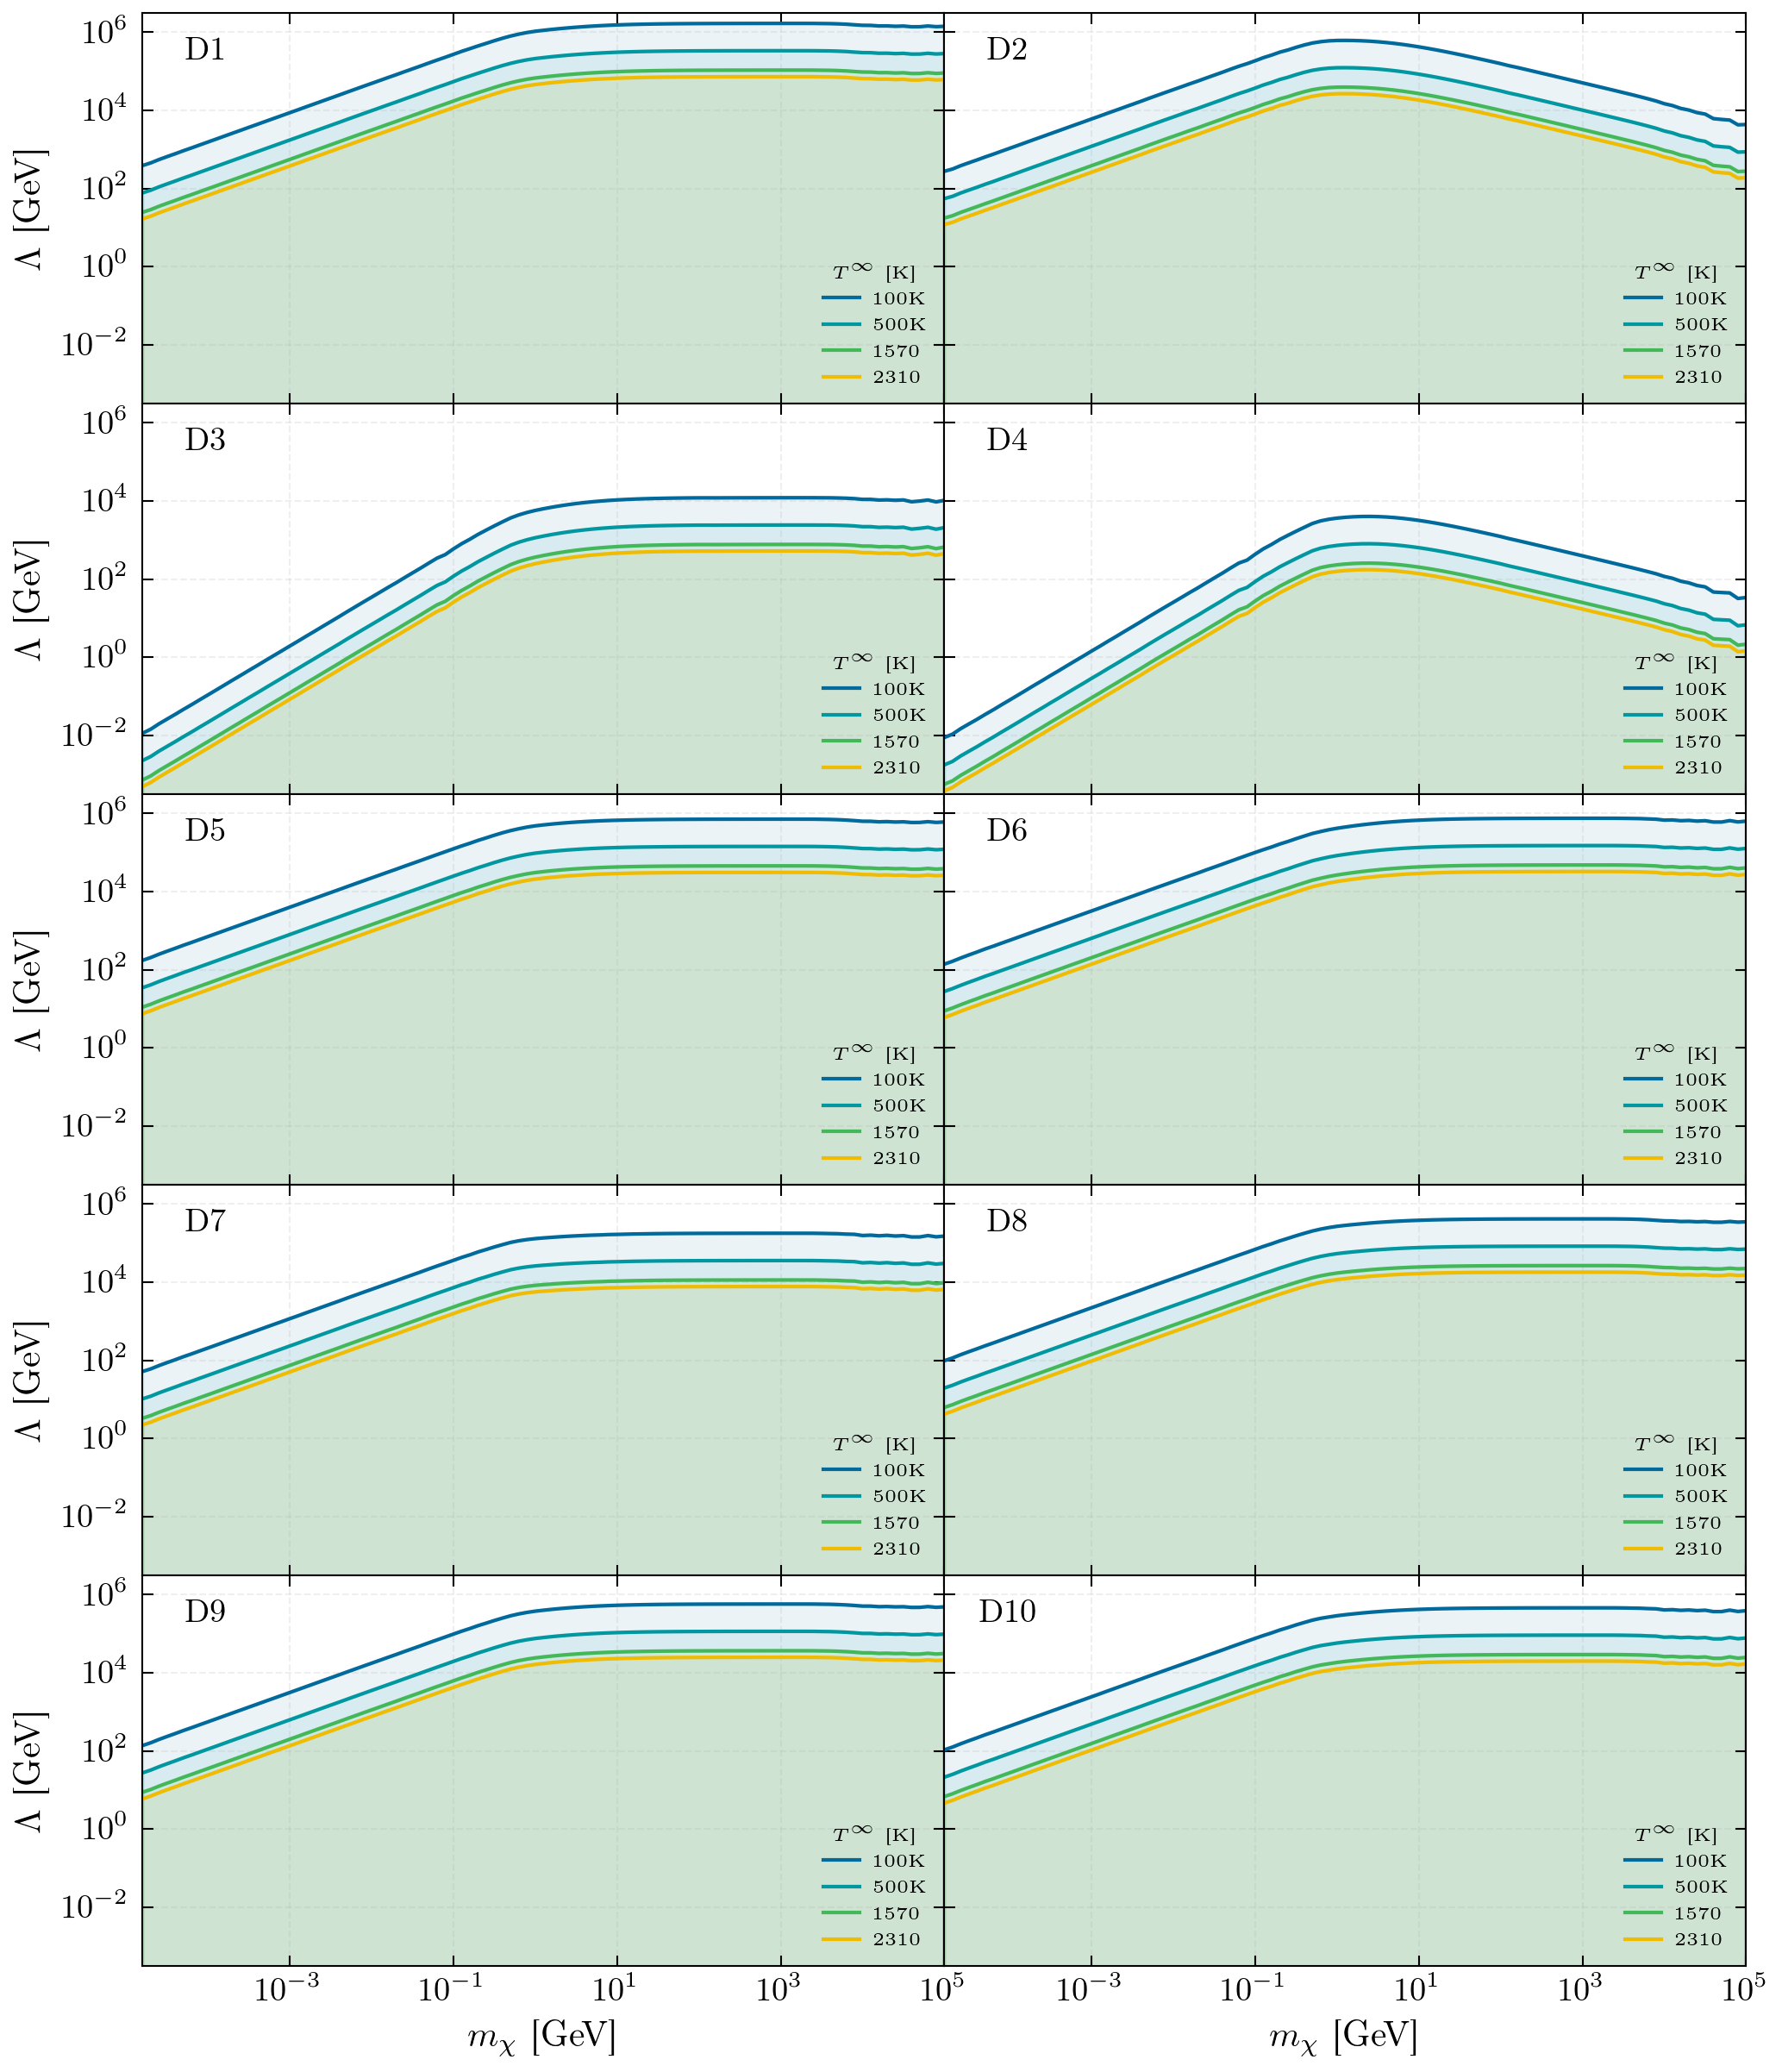

In [28]:
ann_heating_plots()

In [21]:
def combined_heating_plots():
    kheatfiles = glob.glob('*Kheating.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1], linestyle = '--')
            for l in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][l], coloursa[l-1], label = leg_labelsk[l-1], linestyle = ':')
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            if n == 1:
                col.legend(loc = (1, 0.2), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            i+=1
    plt.savefig('com_heating_plots.pdf')
    plt.show()

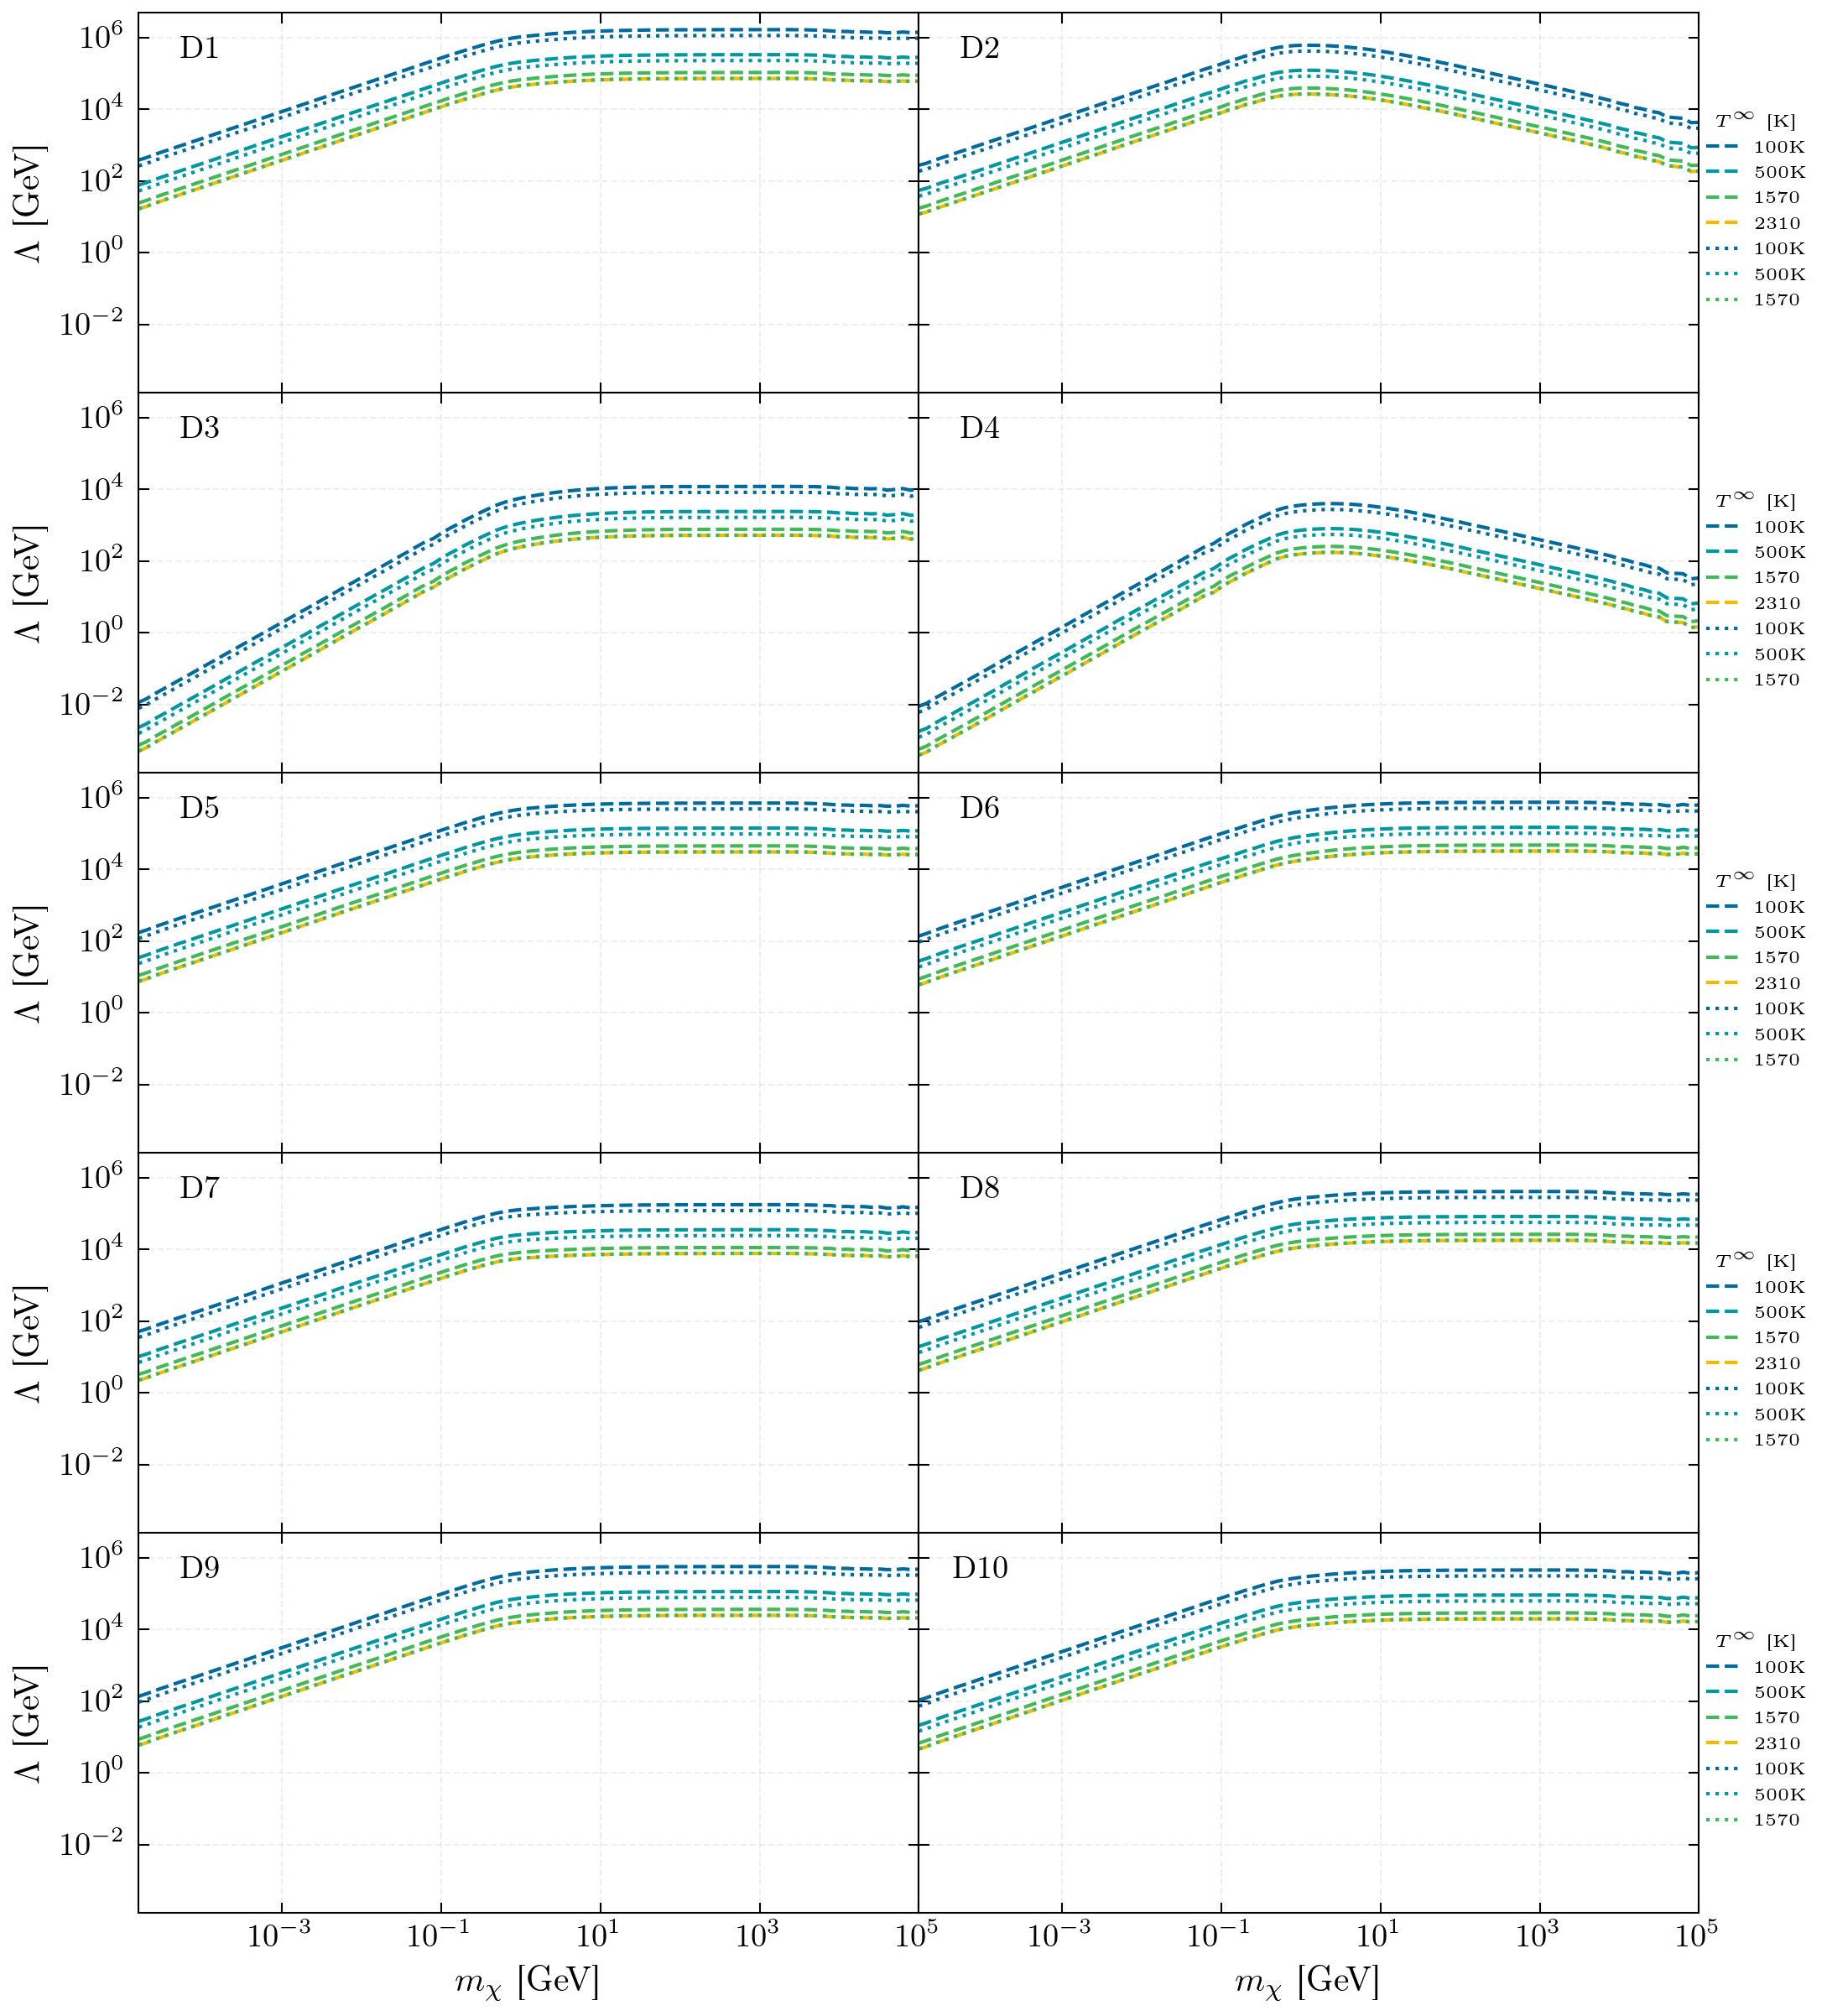

In [22]:
combined_heating_plots()